I will be looking at a dataset containng information about the passengers on the Titanic.

In [1]:
import pandas as pd

titanic = pd.read_excel (r'C:\Users\jeffery.peterson.tm\Documents\School\Classes\DSC 530\Final Project\Titanic\titanic_complete.xls')

In [2]:
titanic.head(n=5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN,NaN,NaN
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,NaN,NaN,"East Providence, RI"
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,NaN,190.0,"East Providence, RI"
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,A,NaN,"East Providence, RI"
4,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,16,NaN,"Norway Los Angeles, CA"


This dataset contains 14 variables. Of these, I am going to look at the following: pclass - passenger class (1=1st, 2=2nd, 3=3rd), survived - did the passenger survive (0=No, 1=Yes), sex - gender of the passenger, age - age of the passenger, fare - price passenger paid for ticket (British Pounds)

I am selecting these variables because the question I am trying to answer is if I would have been likely to survive the voyage. My plan is to develop a logistic regression model that takes into account all of these variables. I will then substitute my personal information to determine my survivability likelihood. I will convert the fare rate to what the cost would be in today's US Dollar and then determine what a current trans-Atlantic cruise would cost. Based on this, I will make a determination as to how much I am willing to spend on my ticket and therefore, which class I will end up in.

If I was going to expand my variable set, I might want to consider the sibsp (number of siblings/spouses aboard) and the parch (number of parents/children aboard). My thinking is that there could be a couple of scenarios that would be applicable to these variables. For example, a family might want to all die together as opposed to having to choose which member gets to live.


In [3]:
from __future__ import print_function, division
import os
os.getcwd()
os.chdir("C:/Users/jeffery.peterson.tm/Documents/School/Classes/DSC 530/Week 2/ThinkStats2-master/code/")

%matplotlib inline
import numpy as np
import thinkstats2
import thinkplot

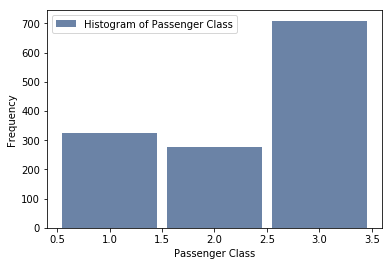

<Figure size 576x432 with 0 Axes>

In [4]:
hist_pclass = thinkstats2.Hist(titanic.pclass, label="Histogram of Passenger Class")
thinkplot.Hist(hist_pclass)
thinkplot.Show(xlabel="Passenger Class", ylabel="Frequency")

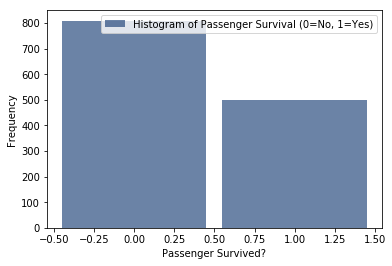

<Figure size 576x432 with 0 Axes>

In [5]:
hist_survived = thinkstats2.Hist(titanic.survived, label="Histogram of Passenger Survival (0=No, 1=Yes)")
thinkplot.Hist(hist_survived)
thinkplot.Show(xlabel="Passenger Survived?", ylabel="Frequency")

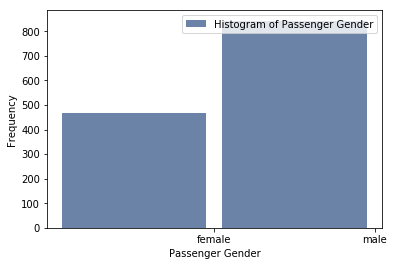

<Figure size 576x432 with 0 Axes>

In [6]:
hist_sex = thinkstats2.Hist(titanic.sex, label="Histogram of Passenger Gender")
thinkplot.Hist(hist_sex)
thinkplot.Show(xlabel="Passenger Gender", ylabel="Frequency")

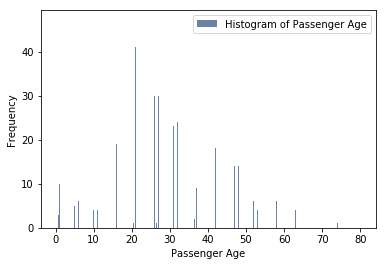

<Figure size 576x432 with 0 Axes>

In [7]:
hist_age = thinkstats2.Hist(titanic.age, label="Histogram of Passenger Age")
thinkplot.Hist(hist_age)
thinkplot.Show(xlabel="Passenger Age", ylabel="Frequency")

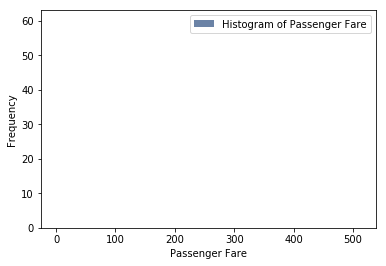

<Figure size 576x432 with 0 Axes>

In [8]:
hist_fare = thinkstats2.Hist(titanic.fare, label="Histogram of Passenger Fare")
thinkplot.Hist(hist_fare)
thinkplot.Show(xlabel="Passenger Fare", ylabel="Frequency")

For some reason, the histogram of fare data is not showing.  I will try a different histogram function.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2D94048D0>]],
      dtype=object)

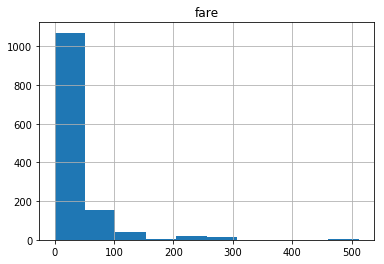

In [9]:
titanic.hist(column="fare")

In [10]:
for pclass, freq in hist_pclass.Smallest(10):
    print(pclass, freq)
for pclass, freq in hist_pclass.Largest(10):
    print(pclass, freq)
titanic["pclass"].isna().sum()
#No outliers for pclass variable.  This makes sense because we only had three possible categories.

1 323
2 277
3 709
3 709
2 277
1 323


0

In [11]:
for survived, freq in hist_survived.Smallest(10):
    print(survived, freq)
for survivesd, freq in hist_survived.Largest(10):
    print(survived, freq)
titanic["survived"].isna().sum()
#No outliers.  They either survived or they didn't.

0 809
1 500
1 500
1 809


0

In [12]:
for sex, freq in hist_sex.Smallest(10):
    print(sex, freq)
for sex, freq in hist_sex.Largest(10):
    print(sex, freq)
titanic["sex"].isna().sum()
#No outliers.  They were either male or female.

female 466
male 843
male 843
female 466


0

In [13]:
for age, freq in hist_age.Smallest(10):
    print(age, freq)
for age, freq in hist_age.Largest(10):
    print(age, freq)
titanic["age"].isna().sum()
#No apparent outliers.  According to WikiPedia, the youngest person on the Titanic was a two-month old.  If you take 2/12, you get 0.1667.
#The older ages seem resonable as well.
#There are, however, 263 blanks where no age is listed.  While I'm not going to say these are outliers right now, I may adjust things later on.

0.1667 1
0.3333 1
0.4167 1
0.6667 1
0.75 3
0.8333 3
0.9167 2
1.0 10
2.0 12
3.0 7
80.0 1
76.0 1
74.0 1
71.0 2
70.5 1
70.0 2
67.0 1
66.0 1
65.0 3
64.0 5


263

In [14]:
for fare, freq in hist_fare.Smallest(10):
    print(survived, freq)
for fare, freq in hist_fare.Largest(10):
    print(fare, freq)
titanic["fare"].isna().sum()
#The value of 17 is actually for a fare of 0.  Since a value of 0 may cause issues in our analysis later on, I am going to make any 0 fare a value of 1.
#The fare value of 512.3292 is nearly double that of the next highest fare.  Because of this, I am going to reject this value as an outlier.
#There is one blank fare entry.  I am going to substitute this blank value for the mean fare.

1 17
1 1
1 1
1 1
1 1
1 3
1 1
1 3
1 2
1 1
512.3292 4
263.0 6
262.375 7
247.5208 3
227.525 5
221.7792 4
211.5 5
211.3375 4
164.8667 4
153.4625 3


1

The next few cells will deal with correcting the data set.

In [15]:
import pandas as pd
titanic["fare"]= titanic["fare"].replace(0.0, 1.0)

In [16]:
titanic.sort_values(by=['fare'])
#The 17 zero fares are now listed as 1.0

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
610,3,0,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,1.0000,NaN,S,NaN,NaN,NaN
190,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,1.0000,NaN,S,NaN,NaN,Belfast
670,2,0,"Knight, Mr. Robert J",male,NaN,0,0,239855,1.0000,NaN,S,NaN,NaN,Belfast
1247,2,0,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,1.0000,NaN,S,NaN,NaN,Belfast
935,2,0,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,1.0000,NaN,S,NaN,NaN,Belfast
936,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,1.0000,NaN,S,NaN,NaN,Belfast
612,3,0,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,1.0000,NaN,S,NaN,NaN,NaN
426,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,1.0000,NaN,S,NaN,NaN,Belfast
1200,3,1,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,1.0000,NaN,S,15,NaN,NaN
46,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,1.0000,A36,S,NaN,NaN,"Belfast, NI"


In [17]:
median_fare = titanic.fare.median()
median_fare

14.4542

In [18]:
titanic["fare"].fillna(14.4542, inplace = True)

In [19]:
titanic["fare"].isna().sum()

0

The blank fare has now been replaced by a median fare of 14.4542.
The last step is to remove the 512.3292 outlier fares.

In [20]:
titanic.drop(titanic[titanic['fare'] > 500.0].index, inplace = True)

In [21]:
titanic.sort_values(by='fare', ascending=False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
411,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
414,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
413,1,0,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
412,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
410,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
409,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
227,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C,4,NaN,NaN
1048,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
1044,1,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
1047,1,0,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,NaN,NaN,"Haverford, PA / Cooperstown, NY"


Now the largest fare listed is 263.

The next part of the analysis will provide the descriptive statistics of the data.

In [22]:
mean_pclass = titanic.pclass.mean()
#mean_survived = titanic.survived.mean()
#mean_sex = titanic.sex.mean()
mean_age = titanic.age.mean()
mean_fare = titanic.fare.mean()
print("The mean pclass is: ", mean_pclass)
#print("The mean survived is: ", mean_survived)
#print("The mean sex is: ", mean_sex)
print("The mean age is: ", mean_age)
print("The mean fare is: ", mean_fare)

#The survived and sex variables do not have a mean because they are boolean values

The mean pclass is:  2.2988505747126435
The mean age is:  29.838451727447218
The mean fare is:  31.825765747126518


In [23]:
median_pclass = titanic.pclass.median()
#median_survived = titanic.survived.median()
#median_sex = titanic.sex.median()
median_age = titanic.age.median()
median_fare = titanic.fare.median()
print("The median pclass is: ", median_pclass)
#print("The median survived is: ", median_survived)
#print("The median sex is: ", median_sex)
print("The median age is: ", median_age)
print("The median fare is: ", median_fare)

#The survived and sex variables do not have a median because they are boolean values

The median pclass is:  3.0
The median age is:  28.0
The median fare is:  14.4542


In [24]:
mode_pclass = titanic.pclass.mode()
#mode_survived = titanic.survived.mode()
#mode_sex = titanic.sex.mode()
mode_age = titanic.age.mode()
mode_fare = titanic.fare.mode()
print("The mode of pclass is: ", mode_pclass)
#print("The mode of survived is: ", mode_survived)
#print("The mode of sex is: ", mode_sex)
print("The mode of age is: ", mode_age)
print("The mode of fare is: ", mode_fare)

#The survived and sex variables do not have a mode because they are boolean values

The mode of pclass is:  0    3
dtype: int64
The mode of age is:  0    24.0
dtype: float64
The mode of fare is:  0    8.05
dtype: float64


In [25]:
var_pclass = titanic.pclass.var()
#var_survived = titanic.survived.var()
#var_sex = titanic.sex.var()
var_age = titanic.age.var()
var_fare = titanic.fare.var()
print("The variance/spread of pclass is: ", var_pclass)
#print("The variance/spread of survived is: ", var_survived)
#print("The variance/spread of sex is: ", var_sex)
print("The variance/spread of age is: ", var_age)
print("The variance/spread of fare is: ", var_fare)

#The survived and sex variables do not have a variance/spread because they are boolean values

The variance/spread of pclass is:  0.6989634017347074
The variance/spread of age is:  207.6995796312988
The variance/spread of fare is:  1978.47256677096


In [26]:
std_pclass = titanic.pclass.std()
#std_survived = titanic.survived.std()
#std_sex = titanic.sex.std()
std_age = titanic.age.std()
std_fare = titanic.fare.std()
print("The standard deviation of pclass is: ", std_pclass)
#print("The standard deviation of survived is: ", std_survived)
#print("The standard deviation of sex is: ", std_sex)
print("The standard deviation of age is: ", std_age)
print("The standard deviation of fare is: ", std_fare)

#The survived and sex variables do not have a standard deviation because they are boolean values

The standard deviation of pclass is:  0.8360403110704097
The standard deviation of age is:  14.411786136051937
The standard deviation of fare is:  44.48002435668128


In [27]:
#The tails of the distributions are calculated with the kurtosis function
titanic.kurtosis()

pclass      -1.301563
survived    -1.757983
age          0.151390
sibsp       19.982678
parch       21.524551
fare        11.144360
body        -1.254052
dtype: float64

A kurtosis < 3 is called platykurtic and means that the tails are shorter and thinner than those of a normal distirbution. A kurtosis > 3 is called leptykurtic and means that the tails are longer and fatter than those of a normal distribution.

Our data has pclass, survived, age, and body as having shorter and thinner tails than a normal distribution, while sibsp, parch, and fare have tails that are longer and fatter than a normal distribution.

In [28]:
#Here is a nice summary table
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1305.000000,1305.000000,1042.000000,1305.000000,1305.000000,1305.000000,121.000000
mean,2.298851,0.380077,29.838452,0.500383,0.384674,31.825766,160.809917
std,0.836040,0.485591,14.411786,1.042888,0.866421,44.480024,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.000000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,263.000000,328.000000


The summary table above is also a good sanity check that our data correction processes did indeed work.
The original data contained 1309 rows.  Once we got rid of the four 512.3292 fares, we dropped down to 1305.
We can also see that our lowest fare is now 1.0 and the largest is 263.

In [29]:
poor = titanic[titanic.fare < 50.0]
others = titanic[titanic.fare >=50.0]

#To construct my PMF, I am going to make two groups of people 
#I separated them based on purchase fare.  It looked like most people in 3rd class paid less than 50 Pounds for their ticket.  I categorized these people as poor.

In [30]:
#To make sure I captured everyone
print(len(poor))
print(len(others))
print(len(titanic))

1067
238
1305


In [31]:
#Here is where we create the pmfs
pmf_poor = thinkstats2.Pmf(poor.fare, label="poor")
pmf_others = thinkstats2.Pmf(others.fare, label="others")

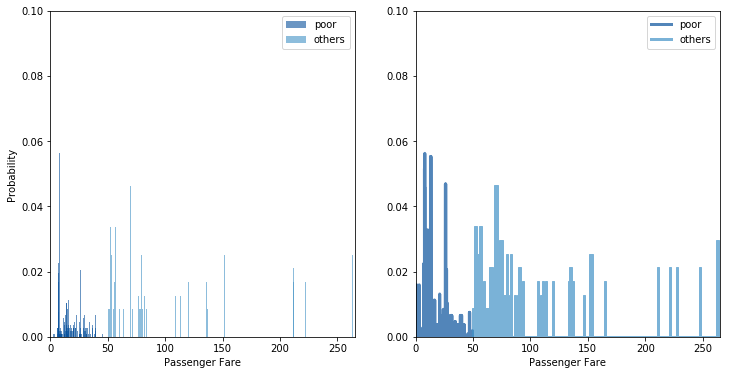

<Figure size 576x432 with 0 Axes>

In [32]:
#Here are the PMF plots of poor and others.
width=0.45
axis = [0, 265, 0, 0.1]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_poor, align="right", width=width)
thinkplot.Hist(pmf_others, align="left", width=width)
thinkplot.Config(xlabel="Passenger Fare", ylabel="Probability", axis=[0, 265, 0, 0.1])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_poor, pmf_others])
thinkplot.Show(xlabel="Passenger Fare", axis=[0, 265, 0, 0.1])

These plots indicate that there is a greater probability that if a passenger purchased a ticket for less than 50 Pounds, they were considered "poor".

A PMF is not the best way to visualize this data.  As the text states on page 39, "PMFs work well if the number of values is small.  But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases."  Evidence of this is the small scale on the probability axis.  This is why my plots look like the noisy plot on page 40.

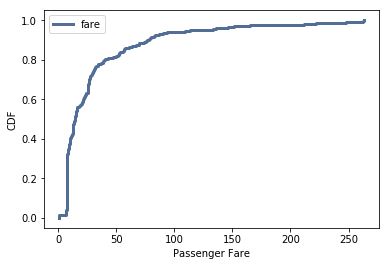

<Figure size 576x432 with 0 Axes>

In [33]:
#Here is the CDF of passenger fare
cdf_fare = thinkstats2.Cdf(titanic.fare, label="fare")
thinkplot.Cdf(cdf_fare)
thinkplot.Show(xlabel="Passenger Fare", ylabel="CDF")

It looks like close to 80% of the passengers paid less than 50 Pounds for their fare.  This means that most of the people on the Titanic were "poor".  At least as far as the under 50 Pounds threshold I established earlier.  So if we are looking at whether most of the people that died were poor, we can immediately establish that to be true since most of the people were indeed poor, regardless of whether they died or not.  Therefore, based on our under 50 Pounds limit, most of the people that died on the Titanic were poor.

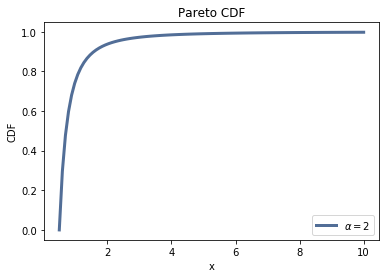

In [34]:
#From the CDF plot, it looks like passenger fare follows the Pareto Distribution.
#Based on the plot in our text on p. 59, I chose my alpha to be 2.
#Here is the model.
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10, n=100) 
    thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

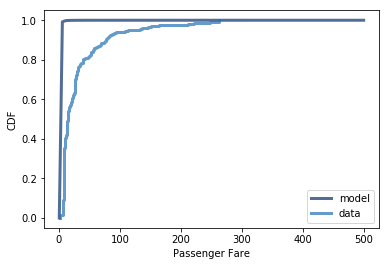

<Figure size 576x432 with 0 Axes>

In [35]:
#Now if we include the model and the data, we obtain:
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 500.0, n=100) 
    thinkplot.Plot(xs, ps, label='model')
cdf_fare = thinkstats2.Cdf(titanic.fare, label="data")
thinkplot.Cdf(cdf_fare)
thinkplot.Show(xlabel="Passenger Fare", ylabel="CDF")

Not as good of a fit as I initially supposed.  This is due to the scaling of the x-axis.

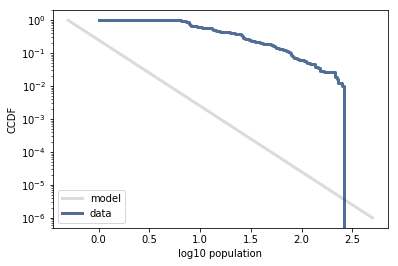

In [36]:
log_fare = np.log10(titanic.fare)
cdf_fare = thinkstats2.Cdf(titanic.fare, label="data")
cdf_log = thinkstats2.Cdf(log_fare, label="data")

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 500, n=100)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

This is even more evident when you overlay the lognormal distribution.  Therefore, a Pareto model is not the best choice for representing passenger fares.  An exponential distribution would be the next distribution I would try.

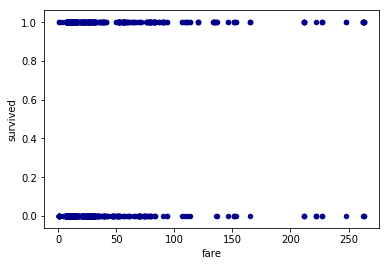

In [37]:
#Scatter plot for fare vs survived
titanic.plot.scatter(x='fare', y='survived', c='DarkBlue')

I realize that this isn't the most informative scatter plot, but there is a particular reason I chose these two variables, and there are some things we can learn from this plot.
I chose these two variables because my hypothesis states that most of the people that died on the Titanic were poor.  The scatter plot does indeed indicate this trend in that there are more data points below 50 for survived=0.
To get a better idea of how these two variables could be related, we need to look at the correlation and covariance.

In [38]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [39]:
cleaned = titanic.dropna(subset=['fare', 'survived'])
fares, survives = cleaned.fare, cleaned.survived
print("The covariance between fare and survived is: ", Cov(fares, survives))

The covariance between fare and survived is:  5.2472760072224425


Covariance is useful for some calculations, but it doesn't mean much by itself. The coefficient of correlation is a standardized version of covariance that is easier to interpret.

In [40]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [41]:
print("The Pearson's correlation between fare and survived is: ", Corr(fares, survives))

The Pearson's correlation between fare and survived is:  0.24312564179354665


The correlation is positive which means that when one variable (fare) is high, the other variable (survived) tends to be high.  However, given that our Pearson's correlation is only 0.243, the relationship is quite weak.  In other words, the correlation is low.

One final thing we can conclude from this scatter plot is that the relationship between fare and survived is not linear.  And this is exactly what we would expect from a binomial variable like we have for survived.

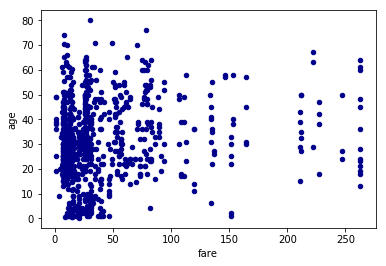

In [42]:
#Scatter plot for fare vs age
titanic.plot.scatter(x='fare', y='age', c='DarkBlue')

This scatter plot shows us that there appears to be slight correlation between age and fare.  While there isn't a definitive connection, one can generally say that the older a person was, the more they paid for their fare.  This is particularly evident with the large grouping of data between 0-50 on fare and 0-10 on age.
We can also see that this is a non-linear relationship.
Let's now look at covariance and Pearson's correlation to get a more accurate representation.

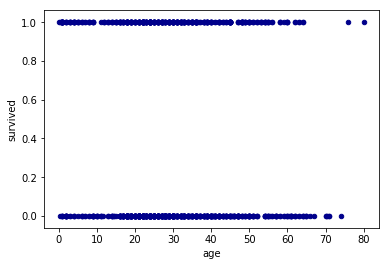

In [43]:
#Scatter plot for passenger class vs survival
titanic.plot.scatter(x="age", y="survived", c="DarkBlue")

In [44]:
cleaned2 = titanic.dropna(subset=['fare', 'age'])
fares, ages = cleaned2.fare, cleaned2.age
print("The covariance between fare and age is: ", Cov(fares, ages))

The covariance between fare and age is:  122.63464836577623


Again, covariance is useful for some calculations, but it doesn't mean much by itself. The coefficient of correlation is a standardized version of covariance that is easier to interpret.

In [45]:
print("The Pearson's correlation between fare and age is: ", Corr(fares, ages))

The Pearson's correlation between fare and age is:  0.17987304789244452


The correlation is positive which means that when one variable (fare) is high, the other variable (age) tends to be high.  However, given that our Pearson's correlation is only 0.180, the relationship is quite weak.  In other words, the correlation is low.

In summary, because both scatter plots provided such low correlation values, we can conclude that each variable does not cause the other variable.  In other words, low correlation indicates low causation.

To test my hypothesis that passenger fare is related to passenger age, I will perform a chi-square test.
One key assumption for the chi-square test is that the value of expected cells should be greater than 5 for at least 20% of the cells in order for the chi-square value to be trusted.

In [46]:
import pandas
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

test_df = pandas.DataFrame(titanic, columns=['age', 'fare'])
chisq_of_df_cols(test_df, 'age', 'fare')

(26034.045082311422,
 3.2668448616278446e-10,
 24638,
 array([[0.00383877, 0.00383877, 0.00383877, ..., 0.00383877, 0.00383877,
         0.00383877],
        [0.00287908, 0.00287908, 0.00287908, ..., 0.00287908, 0.00287908,
         0.00287908],
        [0.00191939, 0.00191939, 0.00191939, ..., 0.00191939, 0.00191939,
         0.00191939],
        ...,
        [0.00095969, 0.00095969, 0.00095969, ..., 0.00095969, 0.00095969,
         0.00095969],
        [0.00095969, 0.00095969, 0.00095969, ..., 0.00095969, 0.00095969,
         0.00095969],
        [0.00095969, 0.00095969, 0.00095969, ..., 0.00095969, 0.00095969,
         0.00095969]]))

The first value (26034) is the chi-square value, followed by the p-value (3.27e-10), then comes the degrees of freedom (24638), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are less than 5, the chi-square test results cannot be trusted. We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is not a relationship between passenger age and passenger fare.

This result corresponds to the conclusion we stated based on the Pearson's Correlation value of 0.180 obtained earlier.

So the slight correlation I thought I observed in the scatter plot is not really there.  

Finally, we will construct a logistic regression model to see if I would have survived the Titanic.

I am going to use the following variables: survived, sex, age, and fare.
I am going to have to convert the sex responses to 1s for males and 0s for females.

In [47]:
titanic['sex'].replace(["female", "male"],[0, 1],inplace=True)

In [48]:
titanic.sort_values(by='sex')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
654,3,0,"Khalil, Mrs. Betros (Zahie ""Maria"" Elias)",0,NaN,1,0,2660,14.4542,NaN,C,NaN,NaN,NaN
1019,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",0,43.0,0,1,24160,211.3375,B3,S,2,NaN,"St Louis, MO"
1017,3,0,"Risien, Mrs. Samuel (Emma)",0,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN
461,3,1,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",0,31.0,1,1,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
1015,3,1,"Riordan, Miss. Johanna ""Hannah""",0,NaN,0,0,334915,7.7208,NaN,Q,13,NaN,NaN
466,3,0,"Goodwin, Miss. Jessie Allis",0,10.0,5,2,CA 2144,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
467,3,0,"Goodwin, Miss. Lillian Amy",0,16.0,5,2,CA 2144,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
456,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",0,NaN,1,0,17453,89.1042,C92,C,5,NaN,"Paris, France / New York, NY"
1012,3,0,"Riihivouri, Miss. Susanna Juhantytar ""Sanni""",0,22.0,0,0,3101295,39.6875,NaN,S,NaN,NaN,NaN
470,3,0,"Goodwin, Mrs. Frederick (Augusta Tyler)",0,43.0,1,6,CA 2144,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"


In [49]:
titanic.sort_values(by='sex', ascending=False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,0,"Abbing, Mr. Anthony",1,42.0,0,0,C.A. 5547,7.5500,NaN,S,NaN,NaN,NaN
726,2,0,"Lingane, Mr. John",1,61.0,0,0,235509,12.3500,NaN,Q,NaN,NaN,NaN
777,3,1,"McCormack, Mr. Thomas Joseph",1,NaN,0,0,367228,7.7500,NaN,Q,NaN,NaN,NaN
780,3,1,"McCoy, Mr. Bernard",1,NaN,2,0,367226,23.2500,NaN,Q,16,NaN,NaN
781,2,0,"McCrae, Mr. Arthur Gordon",1,32.0,0,0,237216,13.5000,NaN,S,NaN,209.0,"Sydney, Australia"
782,2,0,"McCrie, Mr. James Matthew",1,30.0,0,0,233478,13.0000,NaN,S,NaN,NaN,"Sarnia, ON"
784,3,0,"McEvoy, Mr. Michael",1,NaN,0,0,36568,15.5000,NaN,Q,NaN,NaN,NaN
785,1,1,"McGough, Mr. James Robert",1,36.0,0,0,PC 17473,26.2875,E25,S,7,NaN,"Philadelphia, PA"
789,2,0,"McKane, Mr. Peter David",1,46.0,0,0,28403,26.0000,NaN,S,NaN,NaN,"Rochester, NY"
790,3,0,"McMahon, Mr. Martin",1,NaN,0,0,370372,7.7500,NaN,Q,NaN,NaN,NaN


As indicated above, the sex column has been replaced with 0s and 1s.

In [50]:
import statsmodels.formula.api as smf
formula = 'survived ~ sex + age + fare'
model = smf.logit(formula, data=titanic)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.509606
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1042
Model:                          Logit   Df Residuals:                     1038
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 Nov 2019   Pseudo R-squ.:                  0.2454
Time:                        10:14:45   Log-Likelihood:                -531.01
converged:                       True   LL-Null:                       -703.72
                                        LLR p-value:                 1.470e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0232      0.196      5.229      0.000       0.640       1.407
sex           -2.3572      0.155    -15.180      0.000      -2.662      -2.053
age           -0.0111      0.005     -2.053      0.040      -0.022      -0.001
fare           0.0099      0.002      5.242      0.000       0.006       0.014
==============================================================================
"""

All of our model variables are statistically significant because the p-values are all below 0.05.  Our R^2, however, is only 0.245, which is quite low.

In order to plug my personal information into the model, I need to come up with a fare value.  Currently, a 7-day Transatlantic cruise costs about $1500 for a basic cabin.  Using the CPI inflation calculator (http://www.in2013dollars.com/2019-dollars-in-1912?amount=1500) a $1500 ticket would have cost me $56.80 in 1912.  Now, converting that to British Pounds, the fare I would have paid for my Titanic ticket in 1912 would be 45.47 British Pounds.

In [51]:
#To make a prediction, we have to extract the exogenous and endogenous variables.
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [52]:
#The baseline prediction strategy is to guess "survived". In that case, we're right almost 41% of the time.
actual = endog['survived']
baseline = actual.mean()
baseline

0.4059500959692898

In [53]:
#If we use the previous model, we can compute the number of predictions we get right.
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(292.0, 514.0)

In [54]:
#And the accuracy, which is quite a bit higher than the baseline.
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.7735124760076776

In [56]:
#Inputting my personal information into the model
columns = ['sex', 'age', 'fare']
new = pd.DataFrame([[0, 72, 6.06]], columns=columns)
y = results.predict(new)
y

0    0.57012
dtype: float64

After all is said and done, it looks like I would have died on the Titanic with only a 20% chance of survival.